In [ ]:
import torch as t
import torchvision as tv
from torch import nn
from torchvision import transforms
from torchvision import datasets as dsets
from torch.autograd import Variable as V
from torchvision.transforms import ToPILImage
from torch.utils.data import DataLoader
from torch import optim
from torch.nn import functional as F
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# 显示图像
show = ToPILImage()

In [ ]:
# 数据集转换，Compose将多种转换方式集成
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [ ]:
# 下载数据集
trainsets = dsets.CIFAR10(
    root='/Users/cheewing/code/Pytorch/data/',
    train=True,
    download=True,
    transform=transform
)

testsets = dsets.CIFAR10(
    root='/Users/cheewing/code/Pytorch/data/',
    train=False,
    download=True,
    transform=transform
)

In [41]:
# 加载数据
trainloader = DataLoader(
    trainsets,
    batch_size=4,
    shuffle=True,
    num_workers=2
)

testloader = DataLoader(
    testsets,
    batch_size=4,
    shuffle=False,
    num_workers=2
)

In [42]:
# 加载标签
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [43]:
# 定义训练网络
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [44]:
# 损失函数
criterion = nn.CrossEntropyLoss()

# 优化函数
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [45]:
# 训练
t.set_num_threads(8)
for epoch in range(2):
    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = V(inputs), V(labels)
        
        # 梯度清零
        optimizer.zero_grad()
        
        # 前向传播
        outpus = net(inputs)
        
        # 计算损失
        loss = criterion(outpus, labels)
        
        # 反向传播
        loss.backward()
        
        # 参数更新
        optimizer.step()
        
        running_loss += loss.data[0]
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' % (epoch+1, i+1, running_loss/2000))
            running_loss = 0.0
        
print('Finished Training')

[1,  2000] loss: 1.851
[1,  4000] loss: 1.555
[1,  6000] loss: 1.499
[1,  8000] loss: 1.423
[1, 10000] loss: 1.374
[1, 12000] loss: 1.346
[2,  2000] loss: 1.252
[2,  4000] loss: 1.251
[2,  6000] loss: 1.235
[2,  8000] loss: 1.228
[2, 10000] loss: 1.220
[2, 12000] loss: 1.204
Finished Training


ship


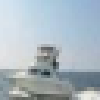

In [46]:
# 测试代码：显示数据集
data, label = trainsets[100]
print(classes[label])
show((data+1)/2).resize((100, 100))

deer


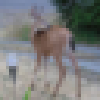

In [47]:
# 测试代码： 显示测试数据集
data, label = testsets[100]
print(classes[label])
show((data+1)/2).resize((100, 100))

实际的label:  cat ship ship plane


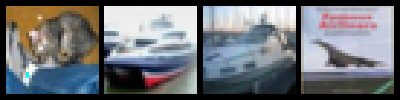

In [57]:
# 测试代码
dataiter = iter(testloader)
images, labels = dataiter.next()
print('实际的label: ', ' '.join(classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid(images/2-0.5)).resize((400, 100))

In [54]:
# 预测
outputs = net(V(images))
_, predicted = t.max(outputs.data, 1)
print('预测结果：',  ' '.join('%5s' %classes[predicted[j]] for j in range(4)))

预测结果：   cat   car plane plane


In [ ]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(V(images))
    _, predicted = t.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()
    
print('10000张测试集中的准确率为：%d %%' % (correct * 100 / total) )
    

In [58]:
from torchvision import models
model = models.vgg16(pretrained = True)

for param in model.parameters():
    param.requires_grad = False

model.classifier = torch.nn.Sequential(
    torch.nn.Linear(25088, 4096),
    torch.nn.ReLU(),
    torch.nn.Dropout(p=0.5),
    torch.nn.Linear(4096, 4096),
    torch.nn.ReLU(),
    torch.nn.Dropout(p=0.5),
    torch.nn.Linear(4096, 2)
)

model

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/cheewing/.torch/models/vgg16-397923af.pth
99.7%

NameError: name 'torch' is not defined